In [45]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
labels = pd.read_csv("D:\\cs156\\train.csv")

In [101]:
ims = []
nsub = 0
for root, subdirs, files in os.walk("D:\\cs156"):
    if len(root) < 10:
        continue
    elif len(subdirs) > 0:
        nsub = len(subdirs)
        n = 0
        patient = [[],[]]
        continue
    elif len(files) > 0:
        for fname in files:
            if '2' in fname:
                patient[1].append(plt.imread(root + '\\' + fname))
            else:
                patient[0].append(plt.imread(root + '\\' + fname))
        n += 1
        if n < nsub:
            continue
    ims.append(patient)

In [131]:
n = 0
for i, patient in enumerate(ims):
    for j, view in enumerate(patient):
        for image in view:
            n += 1
            if image.shape != (2320, 2828):
                print(i, j, image.shape, np.array(image.shape) - (2320,2828))
print(n)

3 1 (2828, 2320) [ 508 -508]
4 0 (2048, 2494) [-272 -334]
5 0 (2048, 2494) [-272 -334]
10 0 (2048, 2494) [-272 -334]
12 0 (2022, 2022) [-298 -806]
12 1 (2022, 2022) [-298 -806]
14 0 (2800, 3168) [480 340]
18 0 (2021, 2022) [-299 -806]
18 1 (2022, 1841) [-298 -987]
19 0 (2021, 1981) [-299 -847]
19 1 (2021, 1852) [-299 -976]
73


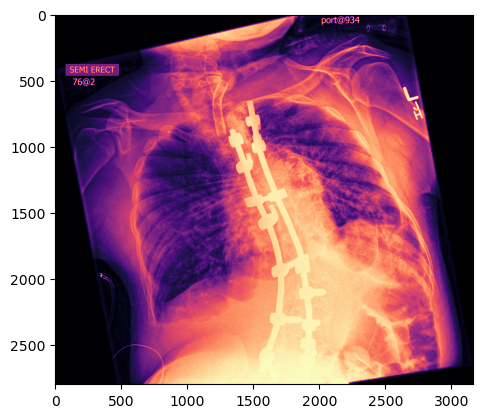

In [331]:
plt.show(plt.imshow(ims[14][0][0], cmap='magma'))

In [312]:
labels = pd.read_csv("D:\\cs156\\train.csv")
labels['female'] = (labels['Sex'] == 'Female').astype(int)*2 - 1
labels['frontal'] = (labels['Frontal/Lateral'] == 'Frontal').astype(int)*2 - 1
labels['AP'] = (labels['AP/PA'] == 'AP').astype(int)*2 - 1
labels = labels.rename(columns={'Enlarged Cardiomediastinum':'Enlarged Card.'})
labels_dropped = labels.drop(columns=['Unnamed: 0','Path','Sex','Frontal/Lateral',
                                      'AP/PA'])
diagnoses = labels.drop(columns=['Age','female','frontal','AP','Unnamed: 0',
                                 'Path','Sex','Frontal/Lateral','AP/PA'])

In [313]:
diags = diagnoses.to_numpy()
diags_n1_fill = diagnoses.fillna(-1).to_numpy()
diags_0_fill = diagnoses.fillna(0).to_numpy()
diags_n12_fill = diagnoses.fillna(-0.5).to_numpy()

In [314]:
freqs_na = np.mean(diags[:,:]==1, axis=0)

In [202]:
cooccurence = np.zeros((28,28))
for r in range(diags.shape[0]):
    for i in range(14):
        for j in range(i,14):
            if diags_0_fill[r,i] == 1 and diags_0_fill[r,j] == 1:
                cooccurence[i,j] = cooccurence[i,j] + 1
            elif diags_0_fill[r,i] == -1 and diags_0_fill[r,j] == 1:
                cooccurence[i+14,j] = cooccurence[i+14,j] + 1
            elif diags_0_fill[r,i] == -1 and diags_0_fill[r,j] == -1:
                cooccurence[i+14,j+14] = cooccurence[i+14,j+14] + 1
            elif diags_0_fill[r,i] == 1 and diags_0_fill[r,j] == -1:
                cooccurence[i,j+14] = cooccurence[i,j+14] + 1

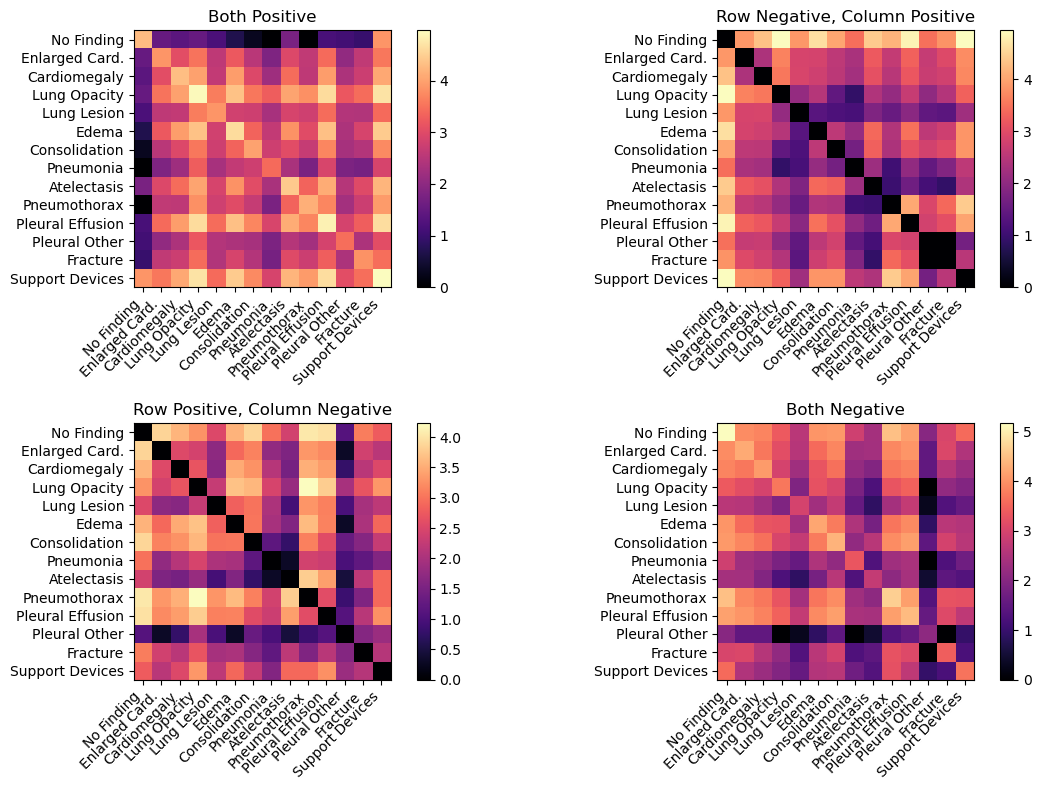

In [344]:
fig = plt.figure(figsize=((12,8)))
fig.add_subplot(2,2,1)
to_plot = cooccurence[0:14,0:14] + cooccurence[0:14,0:14].T - np.diag(np.diag(cooccurence[0:14,0:14]))
plt.imshow(np.log10(to_plot + 1), cmap='magma')
plt.xticks(np.arange(14), diagnoses.columns, rotation=45, ha='right')
plt.yticks(np.arange(14), diagnoses.columns)
plt.title("Both Positive")
plt.colorbar()
fig.add_subplot(2,2,2)
to_plot = cooccurence[14:,0:14] + cooccurence[14:,0:14].T - np.diag(np.diag(cooccurence[14:,0:14]))
plt.imshow(np.log10(to_plot + 1), cmap='magma')
plt.xticks(np.arange(14), diagnoses.columns, rotation=45, ha='right')
plt.yticks(np.arange(14), diagnoses.columns)
plt.title("Row Negative, Column Positive")
plt.colorbar()
fig.add_subplot(2,2,3)
to_plot = cooccurence[0:14,14:] + cooccurence[0:14,14:].T - np.diag(np.diag(cooccurence[0:14,14:]))
plt.imshow(np.log10(to_plot + 1), cmap='magma')
plt.xticks(np.arange(14), diagnoses.columns, rotation=45, ha='right')
plt.yticks(np.arange(14), diagnoses.columns)
plt.title("Row Positive, Column Negative")
plt.colorbar()
fig.add_subplot(2,2,4)
to_plot = cooccurence[14:,14:] + cooccurence[14:,14:].T - np.diag(np.diag(cooccurence[14:,14:]))
plt.imshow(np.log10(to_plot + 1), cmap='magma')
plt.xticks(np.arange(14), diagnoses.columns, rotation=45, ha='right')
plt.yticks(np.arange(14), diagnoses.columns)
plt.title("Both Negative")
plt.colorbar()
plt.tight_layout()

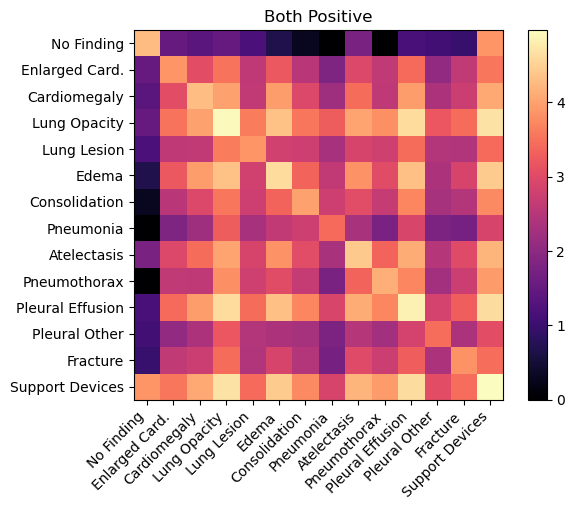

In [330]:
plt.figure()
to_plot = cooccurence[0:14,0:14] + cooccurence[0:14,0:14].T - np.diag(np.diag(cooccurence[0:14,0:14]))
plt.imshow(np.log10(to_plot + 1), cmap='magma')
plt.xticks(np.arange(14), diagnoses.columns, rotation=45, ha='right')
plt.yticks(np.arange(14), diagnoses.columns)
plt.title("Both Positive")
plt.colorbar()
plt.show()

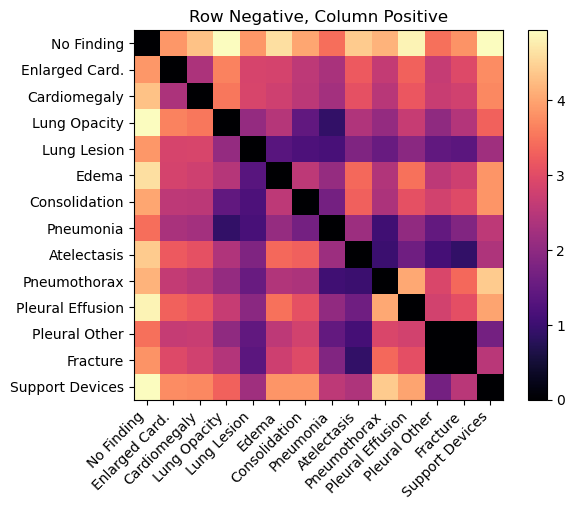

In [329]:
plt.figure()
to_plot = cooccurence[14:,0:14] + cooccurence[14:,0:14].T - np.diag(np.diag(cooccurence[14:,0:14]))
plt.imshow(np.log10(to_plot + 1), cmap='magma')
plt.xticks(np.arange(14), diagnoses.columns, rotation=45, ha='right')
plt.yticks(np.arange(14), diagnoses.columns)
plt.title("Row Negative, Column Positive")
plt.colorbar()
plt.show()

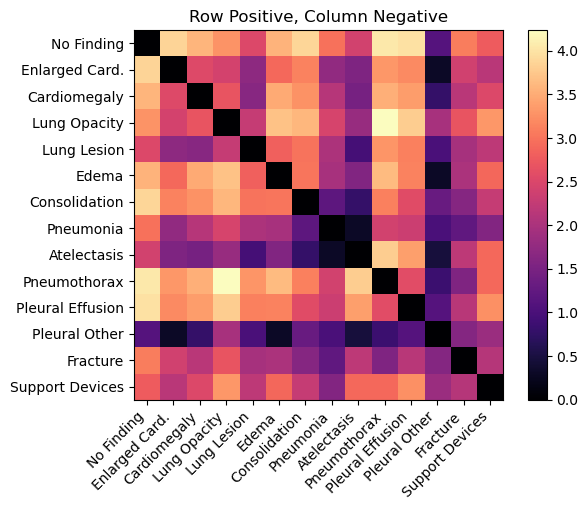

In [327]:
plt.figure()
to_plot = cooccurence[0:14,14:] + cooccurence[0:14,14:].T - np.diag(np.diag(cooccurence[0:14,14:]))
plt.imshow(np.log10(to_plot + 1), cmap='magma')
plt.xticks(np.arange(14), diagnoses.columns, rotation=45, ha='right')
plt.yticks(np.arange(14), diagnoses.columns)
plt.title("Row Positive, Column Negative")
plt.colorbar()
plt.show()

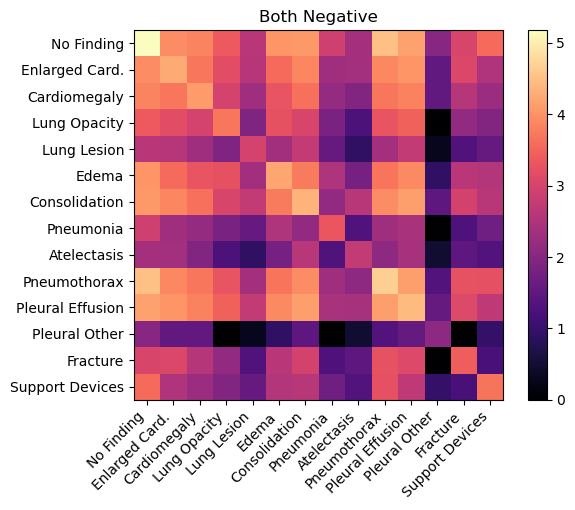

In [328]:
plt.figure()
to_plot = cooccurence[14:,14:] + cooccurence[14:,14:].T - np.diag(np.diag(cooccurence[14:,14:]))
plt.imshow(np.log10(to_plot + 1), cmap='magma')
plt.xticks(np.arange(14), diagnoses.columns, rotation=45, ha='right')
plt.yticks(np.arange(14), diagnoses.columns)
plt.title("Both Negative")
plt.colorbar()
plt.show()

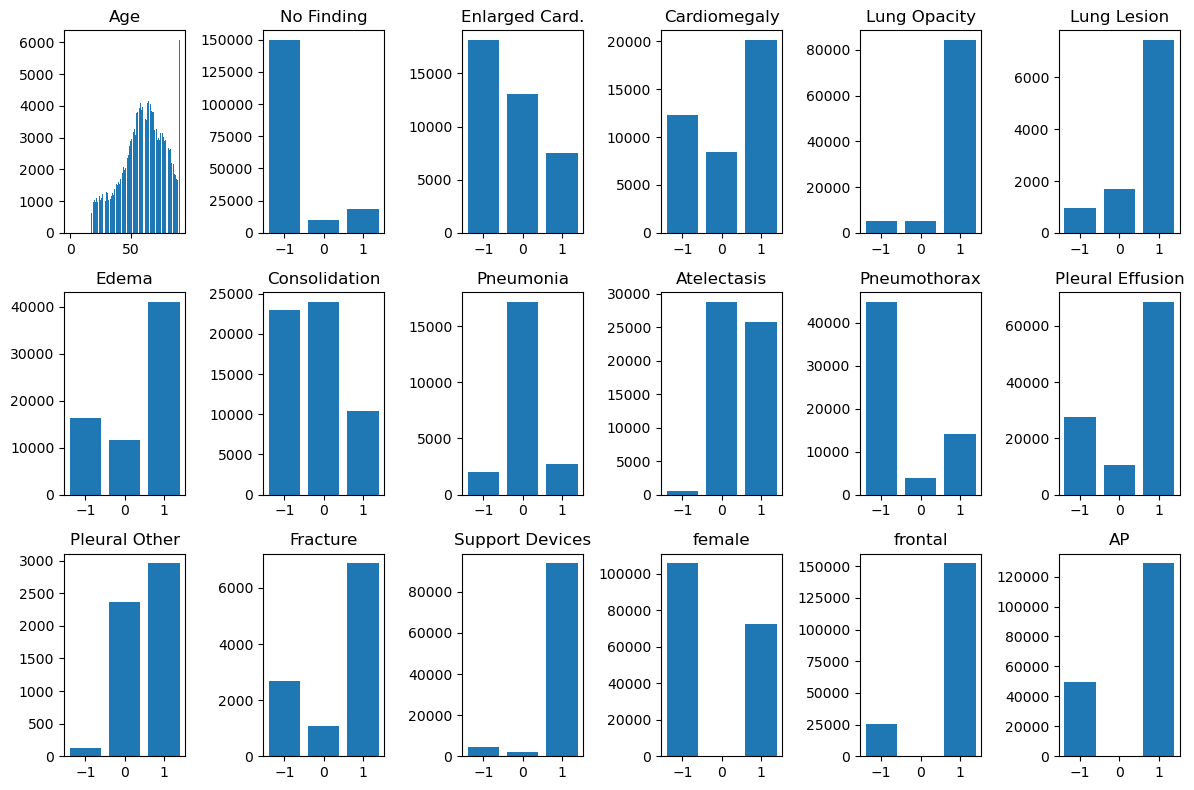

In [339]:
fig = plt.figure(figsize=(12,8))
for i, col in enumerate(labels_dropped.columns):
    fig.add_subplot(3,6,i+1)
    x = np.unique(labels_dropped[col])
    y = []
    for item in x:
        y.append(np.sum(labels_dropped[col] == item))
    plt.bar(x, y)
    plt.title(col)
plt.tight_layout()

In [320]:
freqs = []
freqs_pos = np.mean(diags==1, axis=0)
freqs_neg = np.mean(diags==-1, axis=0)
freqs_unk = np.mean(diags==0, axis=0)
freqs_unm = np.mean(np.isnan(diags), axis=0)
freqs.extend((freqs_pos, freqs_neg, freqs_unk, freqs_unm))

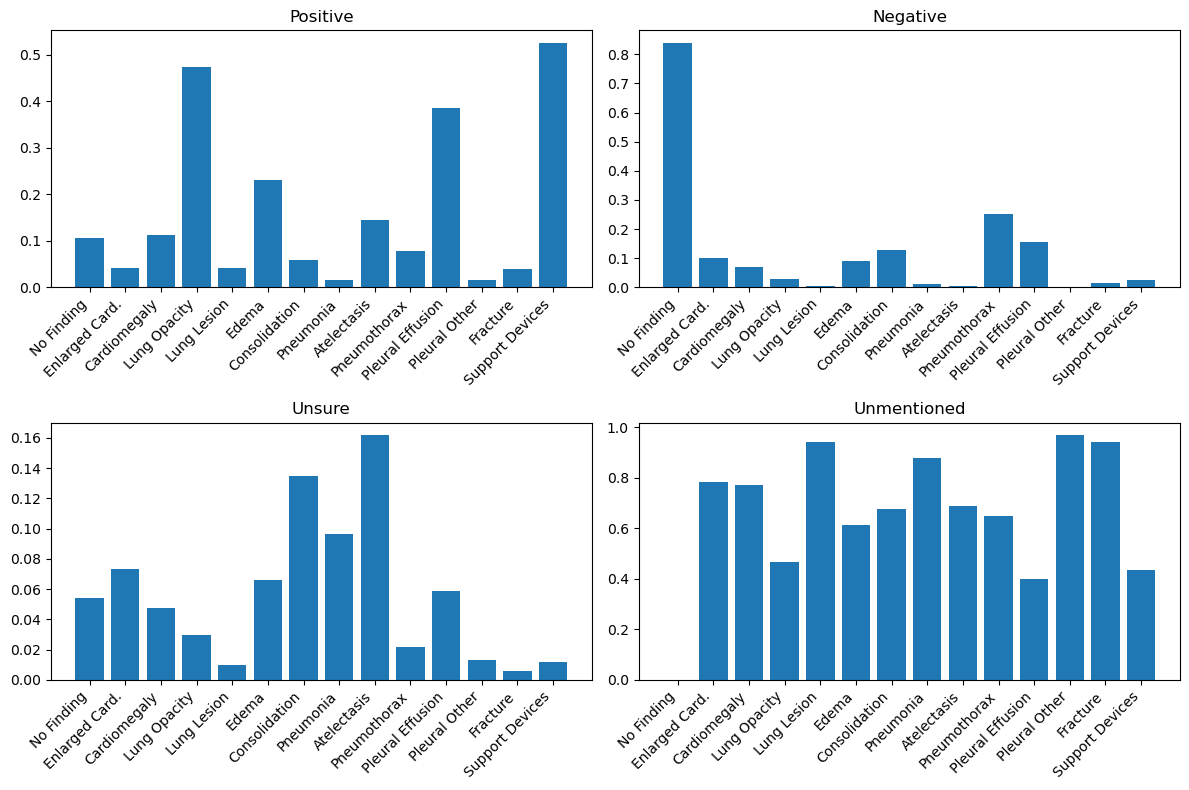

In [336]:
titles = ['Positive', 'Negative', 'Unsure', 'Unmentioned']
fig = plt.figure(figsize=(12,8))
for i in range(4):
    fig.add_subplot(2,2,i+1)
    plt.bar(np.arange(14), freqs[i], tick_label=labels_dropped.columns[1:-3].tolist())
    plt.title(titles[i])
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()

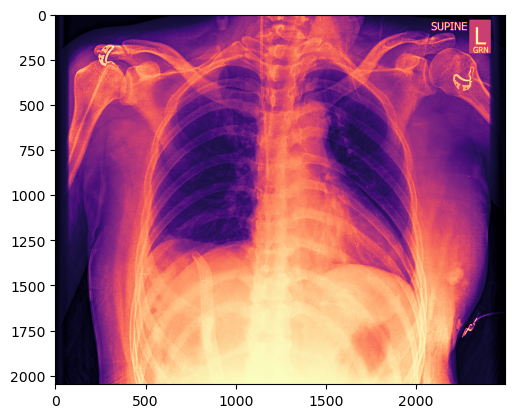

In [333]:
plt.show(plt.imshow(ims[10][0][0], cmap='magma'))